# Dự đoán bệnh tim


### Import thư viện và load file csv

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


In [4]:
data = pd.read_csv('heart-disease.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Chú thích
1. age: tuổi
2. sex: giới tính (1 = nam; 0 = nữ)
3. cp - kiểu đau ngực - tức ngực
    * 0: Đau thắt ngực điển hình: đau ngực liên quan đến giảm cung cấp máu cho tim
    * 1: Đau thắt ngực không điển hình: đau ngực không liên quan đến tim
    * 2: Đau không đau thắt ngực: điển hình là co thắt thực quản (không liên quan đến tim)
    * 3: Không có triệu chứng: đau ngực không có dấu hiệu của bệnh
4. trrestbps - huyết áp lúc nghỉ (tính bằng mm Hg khi nhập viện)
    * trên 130-140 thường gây lo ngại
5. chol - cholestoral huyết thanh tính bằng mg/dl - lượng cholestoral trong máu
    * trên 200 là đáng lo ngại
6. fbs - (đường huyết lúc đói > 120 mg/dl) (1 = true; 0 = false) - lượng đường trong máu
    * '>126' mg/dL báo hiệu bệnh tiểu đường
7. restecg - kết quả điện tâm đồ khi nghỉ ngơi - kết quả điện tâm đồ
    * 0: Không có gì đáng lưu ý
    * 1: Sóng ST-T bất thường
    * 2: Phì đại thất trái có thể hoặc chắc chắn
8. thalach - nhịp tim tối đa đạt được 
9. exang - đau thắt ngực do tập thể dục (1 = có; 0 = không) 
10. oldpeak - tình trạng căng thẳng
11. slope - độ dốc 
    * 0: Upsloping: nhịp tim tốt hơn khi tập thể dục (không phổ biến)
    * 1: Flatsloping: thay đổi tối thiểu (trái tim khỏe mạnh điển hình)
    * 2: Downslopins: dấu hiệu tim không khỏe
12. ca - số mạch chính (0-3) được tô màu bởi flourosopy - lượng các mạch chính
    * mạch màu có nghĩa là bác sĩ có thể nhìn thấy máu chảy qua
    * càng nhiều máu di chuyển càng tốt (không có cục máu đông)
13. thal - kết quả căng thẳng thalium 
14. target - có bệnh hay không (1=có, 0=không) (= thuộc tính dự đoán)


In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Kiểm tra info data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- Dữ liệu có 1 feature kiểu float, 13 feature int64.
- Nhìn vào cột non null ta thấy dữ liệu không có NaN

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

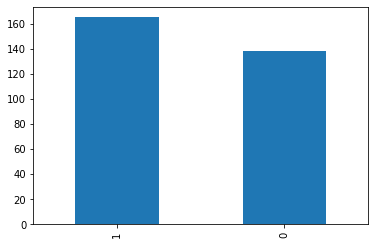

In [9]:
# visualize data
data["target"].value_counts().plot(kind="bar")

* Dữ liệu cân bằng

In [11]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Tỉ lệ bệnh nhân không mắc bệnh tim: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Tỉ lệ bệnh nhân mắc bệnh tim: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Tỉ lệ bệnh nhân không mắc bệnh tim: 45.54%
Tỉ lệ bệnh nhân mắc bệnh tim: 54.46%


In [20]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Tỉ lệ bệnh nhân là nữ : {:.2f}%".format((countFemale / (len(data.sex))*100)))
print("Tỉ lệ bệnh nhân là nam : {:.2f}%".format((countMale / (len(data.sex))*100)))

Tỉ lệ bệnh nhân là nữ : 31.68%
Tỉ lệ bệnh nhân là nam : 68.32%


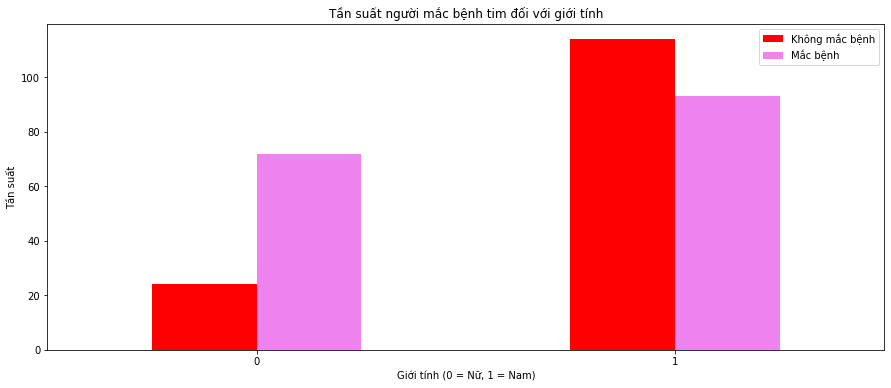

In [27]:
# visualize data
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['red','violet'])
plt.title('Tần suất người mắc bệnh tim đối với giới tính')
plt.xlabel('Giới tính (0 = Nữ, 1 = Nam)')
plt.xticks(rotation=0)
plt.legend(["Không mắc bệnh", "Mắc bệnh"])
plt.ylabel('Tần suất')
plt.show()

### Modelling

In [13]:
x = data.drop(['target'], axis = 1)
y = data.target.values
x.shape,y.shape

((303, 13), (303,))

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [34]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

### RandomForest

In [40]:
RF = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
# Tính accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# Tính precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision: %f' % precision)
# Tính recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall: %f' % recall)
# Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score: %f' % f1)
print(classification_report(y_test, y_pred))

Accuracy: 0.868852
Precision: 0.868852
Recall: 0.868852
F1 score: 0.868852
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### SVM

In [28]:
SVM = SVC(random_state=42, class_weight='balanced')
SVM.fit(x_train, y_train)
y_pred = SVM.predict(x_test)

# Tính accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# Tính precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision: %f' % precision)
# Tính recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall: %f' % recall)
# Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score: %f' % f1)
print(classification_report(y_test, y_pred))

Accuracy: 0.786885
Precision: 0.786850
Recall: 0.786885
F1 score: 0.786655
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        29
           1       0.79      0.81      0.80        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



### LogisticRegression

In [31]:
LR1 = LogisticRegression(random_state=42, class_weight='balanced')
LR1.fit(x_train, y_train)
y_pred = LR1.predict(x_test)

# Tính accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# Tính precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision: %f' % precision)
# Tính recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall: %f' % recall)
# Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score: %f' % f1)
print(classification_report(y_test, y_pred))

Accuracy: 0.868852
Precision: 0.868852
Recall: 0.868852
F1 score: 0.868852
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNN

In [36]:
KNN = KNeighborsClassifier(n_neighbors = 2) 
KNN.fit(x_train, y_train)
y_pred = LR1.predict(x_test)
# Tính accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# Tính precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision: %f' % precision)
# Tính recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall: %f' % recall)
# Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score: %f' % f1)
print(classification_report(y_test, y_pred))

Accuracy: 0.868852
Precision: 0.868852
Recall: 0.868852
F1 score: 0.868852
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

